In [1]:
import arviz as az
import numpy as np
import pymc as pm
import pytensor.tensor as pt
from matplotlib import pyplot
import scipy.stats as st
import scipy.signal
import scipy.integrate
import pandas
import openpyxl
import time
import json
import math

In [62]:
# Read example data
time = np.fromfile(fr"./His110 test data/F5_t13_3_Part2_His110_M0_m0_time.npy")
intensity = np.fromfile(fr"./His110 test data/F5_t13_3_Part2_His110_M0_m0_intensity.npy")

In [63]:
average_initial_intensity = np.mean([intensity[n] for n in range(3)])
average_final_intensity = np.mean([intensity[n] for n in range(len(intensity) - 3, len(intensity))])
slope_guess = (average_final_intensity - average_initial_intensity) / (time[-1] - time[0])
# calculate intercept_guess based on the slope_guess and the formula for a linear equation
intercept_guess = average_initial_intensity - slope_guess * time[0]
intensity_corrected = [intensity[n] - (slope_guess * time[n] + intercept_guess) for n in range(len(time))]

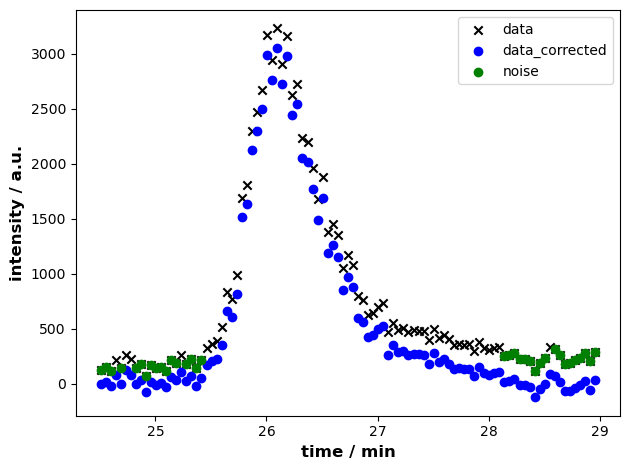

In [90]:
fig, ax = pyplot.subplots()
ax.scatter(time, intensity, marker="x", color="black", label="data")
ax.scatter(time, intensity_corrected, marker="o", color="blue", label="data_corrected")
ax.scatter(noise_time, noise_intensity, marker="o", color="green", label="noise")
ax.set_xlabel("time / min", fontsize=12, fontweight="bold")
ax.set_ylabel("intensity / a.u.", fontsize=12, fontweight="bold")
pyplot.legend()
pyplot.tight_layout()
pyplot.show()

In [75]:
noise_guess = np.percentile(intensity_corrected, 33)
noise_guess

64.79649842936108

In [96]:
# select lowest third of all data points as noise -> noise_tuple
intensity_tuple = list(enumerate(intensity_corrected))
intensity_tuple.sort(key=lambda x: x[1])
noise_range = int(np.round(0.35 * len(intensity_corrected), decimals=0))
noise_tuple = intensity_tuple[:noise_range]
noise_index = sorted([x[0] for x in noise_tuple])
noise_time = [time[n] for n in noise_index]
noise_intensity = [intensity[n] for n in noise_index]
noise_width = max(noise_intensity) - min(noise_intensity)

In [92]:
baseline_fit = st.linregress(noise_time, noise_intensity)

In [97]:
baseline_fit

LinregressResult(slope=21.145468651087388, intercept=-370.0434579286009, rvalue=0.6775590070533908, pvalue=7.788396972509105e-06, stderr=3.995556254664736, intercept_stderr=107.40372995706258)